# Film analysis with ML

This dataset contains information about the top 10,000 movies listed on IMDb, one of the most popular online databases of movies, TV shows, and celebrities. The data includes a variety of attributes such as movie name, release year, rating, metascore, gross income, votes, runtime, genre, certificate, description, directors, and stars. The dataset has been downloaded from kaggle

## Cleaning data set 

In [23]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np
import seaborn as sns
from scipy.stats import zscore

In [5]:
#Loading data set 
data = pd.read_csv('C:\\Users\\amraf\\Desktop\\IRONHACK\\Week_9\\Final_project\\Finall-project\\Data\\raw-data\\data.csv')
data.head()

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


In [6]:
#Checking for shape of our data frame(number of  rows and columns)
data.shape

(10000, 13)

In [7]:
#Checking for types of our data set 
data.dtypes

Unnamed: 0               int64
Movie Name              object
Year of Release          int64
Run Time in minutes      int64
Movie Rating           float64
Votes                    int64
MetaScore              float64
Gross                  float64
Genre                   object
Certification           object
Director                object
Stars                   object
Description             object
dtype: object

In [30]:
# Drop the column 
column_to_drop = 'Unnamed: 0'
data_cleaned = data.drop(column_to_drop, axis=1, errors='ignore')

In [31]:
#Rename the columns
data_cleaned.rename(columns={'Run Time in minutes': 'Run Time',
                            'Stars': 'Actors'}, inplace=True)

In [32]:
#Checking for missing values
data_cleaned.isna().sum()

Movie Name            0
Year of Release       0
Run Time              0
Movie Rating          0
Votes                 0
MetaScore          2026
Gross              2915
Genre                 0
Certification       369
Director              0
Actors                0
Description           0
dtype: int64

After trying to handal missing values with median and mode I noticed that the skewnes is even bigger than it was before I computed median, and I came to conclusion that droping missing values is best option for this data set.

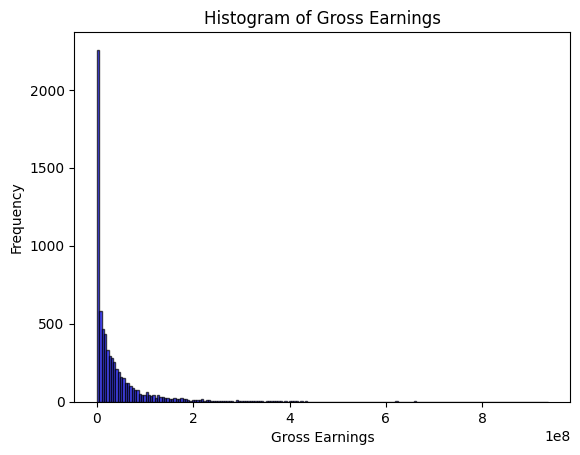

In [33]:
#Creating histogram to check skewnes (I will do this for all thre columns )
plt.hist(data_cleaned['Gross'].dropna(), bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.title("Histogram of Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Frequency")
plt.show()

In [34]:
#Calculating skewnes
skewness_gross = skew(data_cleaned['Gross'].dropna())
print("Skewness of Gross:", skewness_gross)

Skewness of Gross: 4.265837776872137


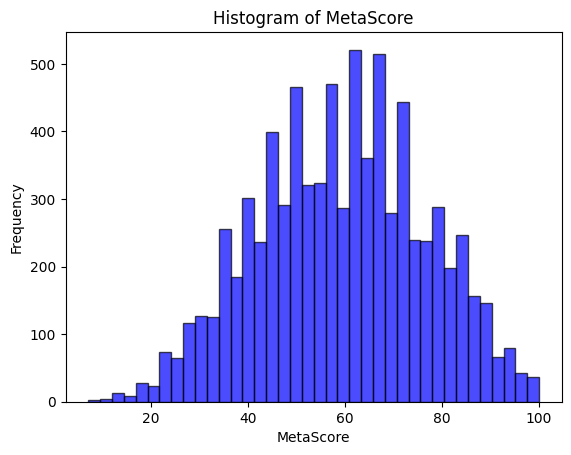

In [35]:
plt.hist(data_cleaned['MetaScore'].dropna(), bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.title("Histogram of MetaScore")
plt.xlabel("MetaScore")
plt.ylabel("Frequency")
plt.show()

In [36]:
skewness_MetaScore = skew(data_cleaned['MetaScore'].dropna())
print("Skewness of MetaScore:", skewness_MetaScore)

Skewness of MetaScore: -0.0649244836869138


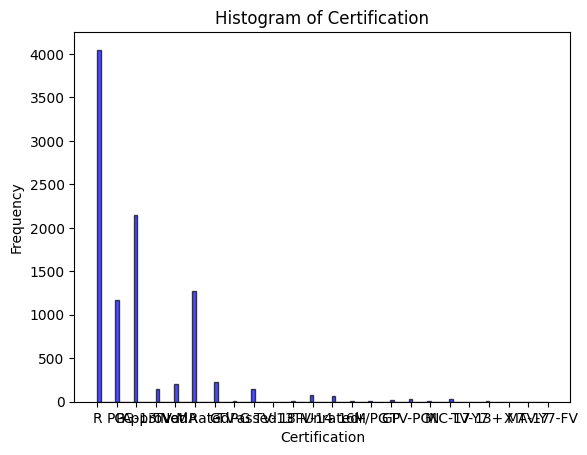

In [37]:
plt.hist(data_cleaned['Certification'].dropna(), bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.title("Histogram of Certification")
plt.xlabel("Certification")
plt.ylabel("Frequency")
plt.show()

In [38]:
#Droping missing values
data_cleaned = data.dropna(subset=['Gross', 'MetaScore','Certification'])

In [39]:
data_cleaned.shape

(6465, 13)

Removing outliers

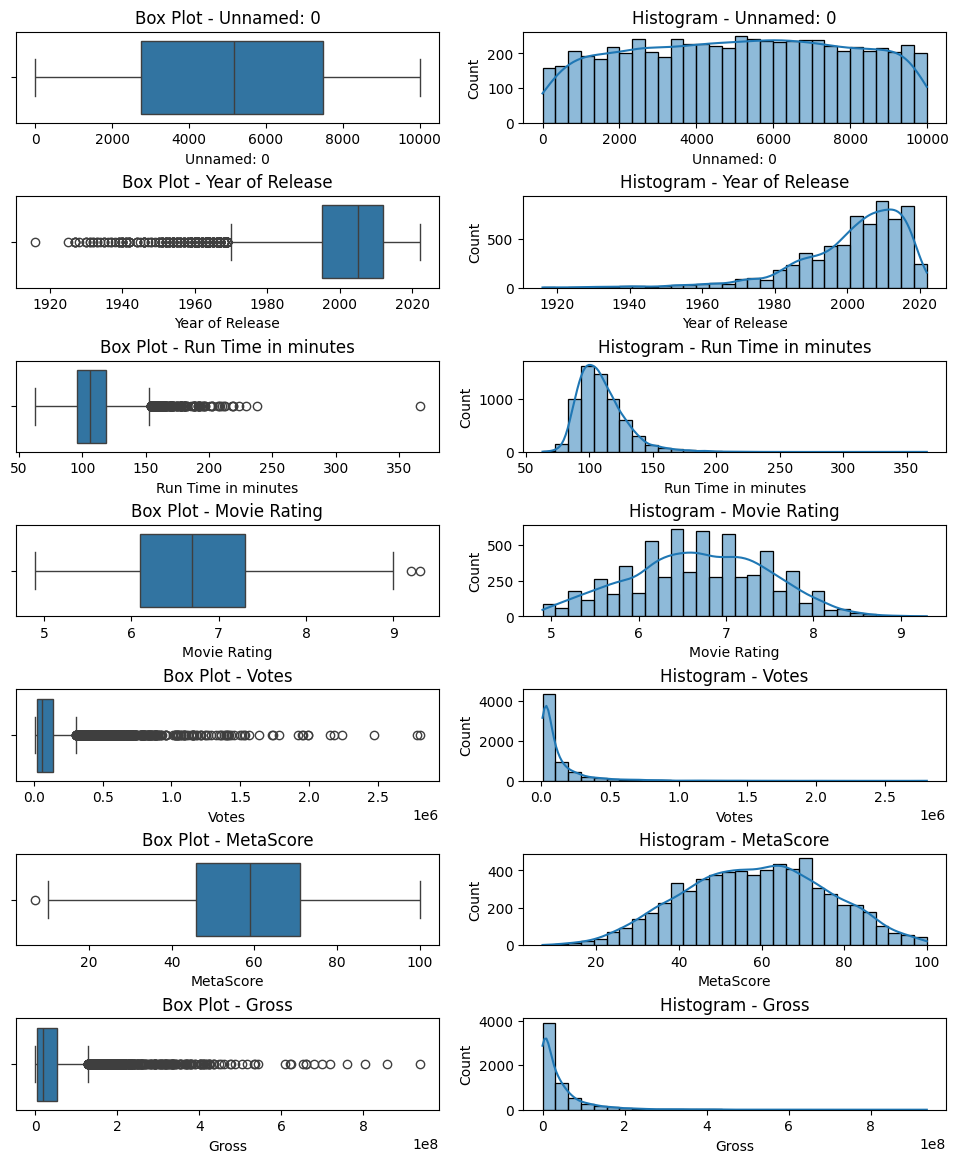

In [40]:
#creating numerical columns to check for outliers
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(12, 2 * len(numerical_columns)))
fig.subplots_adjust(hspace=0.8)

# Plot box plots and histograms for each numerical column
for i, column in enumerate(numerical_columns):
    # Box Plot
    sns.boxplot(x=data_cleaned[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot - {column}')

    # Histogram
    sns.histplot(data_cleaned[column], bins=30, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram - {column}')

plt.show()

In [41]:
#Remove outliers using z-score
z_scores = zscore(data_cleaned.select_dtypes(include=['float64', 'int64']))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)
data_cleaned_no_outliers = data_cleaned[~outliers]

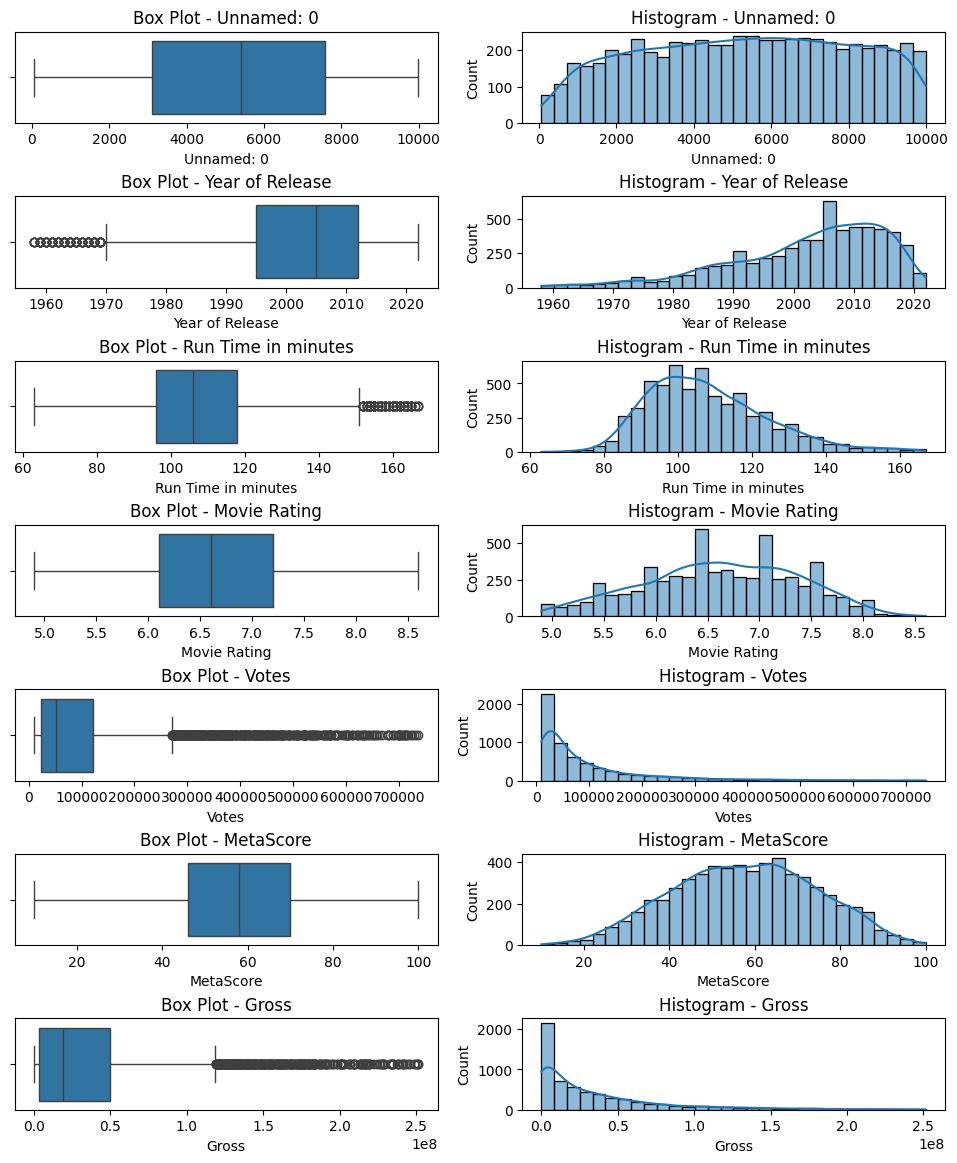

In [42]:
#Checking removed outliers 
numerical_columns = data_cleaned_no_outliers.select_dtypes(include=['float64', 'int64']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(12, 2 * len(numerical_columns)))
fig.subplots_adjust(hspace=0.8)

# Plot box plots and histograms for each numerical column
for i, column in enumerate(numerical_columns):
    # Box Plot
    sns.boxplot(x=data_cleaned_no_outliers[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot - {column}')

    # Histogram
    sns.histplot(data_cleaned_no_outliers[column], bins=30, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram - {column}')

plt.show()

After removed outliers let's check how many rows do we have left

In [50]:
data_cleaned_no_outliers.shape

(6062, 12)

In [47]:
data_cleaned_no_outliers = data_cleaned_no_outliers.drop('Unnamed: 0', axis=1)

In [48]:
data_cleaned_no_outliers.to_csv('C:\\Users\\amraf\\Desktop\\IRONHACK\\Week_9\\Final_project\\Finall-project\\Data\\cleaned-data\\cleaned-data.csv', index=False)

In [51]:
data_cleaned_no_outliers.head()

,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
58,Life Is Beautiful,1997,116,8.6,723773,59.0,57600000.0,"['Comedy', ' Drama', ' Romance']",PG-13,['Roberto Benigni'],"['Roberto Benigni', 'Nicoletta Braschi', 'Gior...","['When', 'an', 'open-minded', 'Jewish', 'waite..."
76,Psycho,1960,109,8.5,699966,97.0,32000000.0,"['Horror', ' Mystery', ' Thriller']",R,['Alfred Hitchcock'],"['Anthony Perkins', 'Janet Leigh', 'Vera Miles...","['A', 'Phoenix', 'secretary', 'embezzles', '$4..."
84,Cinema Paradiso,1988,155,8.5,274382,80.0,11990000.0,"['Drama', ' Romance']",R,['Giuseppe Tornatore'],"['Philippe Noiret', 'Enzo Cannavale', 'Antonel...","['A', 'filmmaker', 'recalls', 'his', 'childhoo..."
88,Once Upon a Time in the West,1968,165,8.5,342065,82.0,5320000.0,['Western'],PG-13,['Sergio Leone'],"['Henry Fonda', 'Charles Bronson', 'Claudia Ca...","['A', 'mysterious', 'stranger', 'with', 'a', '..."
110,Oldboy,2003,120,8.4,612299,78.0,710000.0,"['Action', ' Drama', ' Mystery']",R,['Park Chan-wook'],"['Choi Min-sik', 'Yoo Ji-tae', 'Kang Hye-jeong...","['After', 'being', 'kidnapped', 'and', 'impris..."
